<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loop-Like-a-Native-[video].-Ned-Batchelder,-2013." data-toc-modified-id="Loop-Like-a-Native-[video].-Ned-Batchelder,-2013.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loop Like a Native <a href="https://youtu.be/EnSu9hHGq5o" target="_blank">[video]</a>. Ned Batchelder, 2013.</a></span><ul class="toc-item"><li><span><a href="#Generators" data-toc-modified-id="Generators-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generators</a></span></li></ul></li><li><span><a href="#pd.MultiIndex" data-toc-modified-id="pd.MultiIndex-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>pd.MultiIndex</code></a></span></li><li><span><a href="#pd.DataFrame.groupby" data-toc-modified-id="pd.DataFrame.groupby-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>pd.DataFrame.groupby</code></a></span><ul class="toc-item"><li><span><a href="#Ex-4.1" data-toc-modified-id="Ex-4.1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ex 4.1</a></span></li><li><span><a href="#Ex-4.2" data-toc-modified-id="Ex-4.2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ex 4.2</a></span></li></ul></li></ul></div>

In [1]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

# embed static images in the ipynb
%matplotlib inline 

The `<f8` data type may be a bit confusing to you. First off, the `<` in the dtype indicates the [byte order](https://numpy.org/doc/stable/reference/generated/numpy.dtype.byteorder.html). `<` is the little-endian indicator. 
> On [Endianness](https://en.wikipedia.org/wiki/Endianness): In computing, endianness is the ordering or sequencing of bytes of a word of digital data in computer memory storage or during transmission. Endianness is primarily expressed as big-endian or little-endian. Big-endian systems store the most significant byte of a word at the smallest memory address and the least significant byte at the largest. A little-endian system, in contrast, stores the least-significant byte at the smallest address.

`f8` indicates that the respective column has a float datatype. 

----

# Scratch Paper

## Loop Like a Native [[video]](https://youtu.be/EnSu9hHGq5o). Ned Batchelder, 2013.

#### Looping: `zip` vs. `enumerate`

In [3]:
letters = ['a', 'b', 'c']
nums = [0, 1, 2]
# Goal: Create (letter, int) pairs

# Without zip
for idx, letter in enumerate(letters):
    num = nums[idx]
    print(f"{letter} {num}")

# With zip
for num, letter in zip(nums, letters):
    print(f"{letter} {num}")

a 0
b 1
c 2
a 0
b 1
c 2


What's the advantage of using zip? 
- We've got less code and we're not distracted by an unnecessary index when we only want to deal with the elements of the iterables. 
- Powerful: `zip` is a function that takes in iterables as values and produces a value which is itself an iterable. 

**Note** that the two collections have to have the same number of elements for `zip`. One advantage of using `enumerate` to keep an index is that the number of elements won't need to match for the two collections. 


Since `zip` accepts a stream of pairs, we can use it to generate dictionaries:

In [4]:
letters = ['a', 'b', 'c']
nums = [0, 1, 2]
dict(zip(letters, nums))

{'a': 0, 'b': 1, 'c': 2}

In [16]:
import numpy as np 
buildings = ['b' + str(i) for i in np.arange(10)]
heights = np.random.random(10)
bh: dict = dict(zip(buildings, heights))

# Print the height of the tallest building in 'bh'
print(max(bh.values()))

# Print the building-height pair corresponding to the tallest building
print(max(bh.items(), key=lambda b: b[1])) # max of the seq sorted by seq[1] 

# Print the name of the tallest building
print(max(bh, key=bh.get))

0.9906713395043445
('b6', 0.9906713395043445)
b6


### Generators

In [24]:
# Create a generator to return evens from an iterable.

def evens(seq):
    for n in seq:
        if n % 2 == 0:
            yield n

Even if you use a generator on an infinite sequence, it will run without issue. This is becuase generators have what's known as "lazy" iteration. 

Generators look functions that have return statements but have important differences. 
Running a generator doesn't necessarily start at the beginning of its source code because `yield` preserves the current state of execution, while `return` ends a function. Generators create iterator objects, so the execution only ends if the generator reaches a return statement or it runs out of values to yield. 

---- 
# Just Python

In [10]:
x = {"apple", "banana", "cherry"}
y = {"google", "microsoft", "apple"}
x.difference_update(y)
x

{'banana', 'cherry'}

---- 
# NumPy

In [1]:
import numpy as np

In [4]:
# Generate 1D array of random ints b/w 0 and 5 with size 15.
np.random.randint(6, size=15)

array([2, 1, 4, 0, 2, 4, 4, 3, 3, 1, 3, 3, 2, 2, 0])

In [5]:
# Generate a 2 by 4 matrix (np.ndarray) containing ints b/w 0 and 4 (inclusive).
np.random.randint(5, size=(2, 4))

array([[2, 3, 3, 4],
       [2, 2, 1, 3]])

----
# Pandas

In [6]:
import pandas as pd

cl: `pd.Series.transform` calls "func" to transform the values of a pd.Series object.

cl: The first argument of `pd.DataFrame.transform` is a function or list of functions.

Q: Given `df`, mimic the `df + 1` operation with `pd.DataFrame.transform`.

In [24]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [8]:
df + 1

,A,B
0,1,2
1,2,3
2,3,4


In [9]:
df.transform(lambda x: x + 1)

,A,B
0,1,2
1,2,3
2,3,4


Q: Display the column types of `df`.

In [15]:
df.dtypes

A    int64
B    int64
dtype: object

Q: What type do string columns have in Pandas? 

In [16]:
df.astype(str).dtypes

A    object
B    object
dtype: object

Q: Convert `df` to string type and add a "0" to the end of each element. 

In [17]:
df.astype(str).transform(lambda s: s + "0")

,A,B
0,00,10
1,10,20
2,20,30


Q: Return the square root and exponential of `s` in a pd.DataFrame.

In [10]:
s = pd.Series(np.arange(1,5))
s

0    1
1    2
2    3
3    4
dtype: int32

In [11]:
s.transform([np.sqrt, np.exp])

,sqrt,exp
0,1.000000,2.718282
1,1.414214,7.389056
2,1.732051,20.085537
3,2.000000,54.598150


---
## `pd.MultiIndex`

Q: What is the interface for hierarchical indexing in Pandas?

In [26]:
arrays = [[1, 1, 2, 2],
          ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))
# pd.MultiIndex is the interface for hierachcal index objects.

MultiIndex([(1,  'red'),
            (1, 'blue'),
            (2,  'red'),
            (2, 'blue')],
           names=['number', 'color'])

In [39]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
           ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                   index=index)
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

---
## `pd.DataFrame.groupby`

In [29]:
df = pd.DataFrame({
    'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
    'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [32]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


We can groupby different levels of a hierarchical index
using the `level` parameter:

In [36]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
           ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                   index=index)
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [37]:
df.groupby(level=0).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [38]:
df.groupby(level="Type").mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


Q: What does `pd.Series.value_counts` do?

Return a Series containing counts of unique values.

Q: Return the number of non-null values in `s`.

In [18]:
s = pd.Series([0.0, 1.0, np.nan])
s.count()

2

In [22]:
pd.DataFrame(s).notnull().sum()

0    2
dtype: int64

In [ ]:
import pandas as pd
from typing import Iterable

def frequency_encode(X: pd.DataFrame, cat_features: Iterable[str]):
    """Frequency encode categorical features of X

    Args:
        X (pd.DataFrame): feature matrix
        cat_features (Iterable[str]): list of categorical feature names
    """
    for feature in cat_features:
        assert isinstance(feature, str), "Column names must be strings."
        assert feature in X.columns, "Feature '{feature}' is not in X.columns"
        # Swap out each category for the frequency count of the category
        X[feature] = X[feature].groupby(X[feature]).transform('count')

In [21]:
# Make pd.DataFrame from sklearn's Boston dataset.
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
# Set column indices as feature names
boston_df  = pd.DataFrame(boston.data, 
                          columns=boston.feature_names,) 
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Q: Return a pd.Series containing the counts of unique values in the 'RAD' column.

In [22]:
boston_df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

----
# 4. Data Visualization - Matplotlib & Seaborn

In [22]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

# embed static images in the ipynb
%matplotlib inline 

Q: What is the function of `%matplotlib inline` in a Jupyter notebook?

- Plots will be embedded in the notebook as static images.

Q: What is the function of `%matplotlib notebook` in a Jupyter notebook?

- Plots will be embedded in the notebook as interactive plots.

Q: How can you embed interactive plots in a Jupyter notebook?

- ```%matplotlib notebook```

Q: How can you embed static impages of plots in a Jupyter notebook?

- ```%matplotlib inline```

### Ex 4.1 

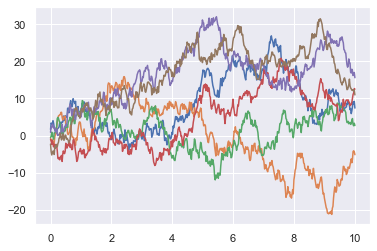

In [25]:
# Generate simple random walk plot 
rng = np.random.RandomState(1)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)

Q: What does the `np.cumsum` method do?
> Return the **cumulative sum** of the elements of a `np.ndarray` along a given axis.

Q: What does the `np.linspace` method do?
> Return a `np.ndarray` of evenly spaced numbers over a specified interval.

### Ex 4.2

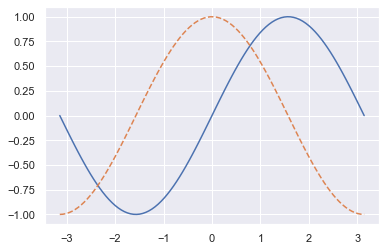

In [27]:
# plot sine and cosine graphs from -pi to pi
x = np.linspace(start=-np.pi, stop=np.pi, num=100)  
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Q: What is the type of `plt.figure`?  
: `function` | a method inside the matplotlib.pyplot module

Q: What does the `plt.figure` method do?
- Create a new figure, or activate an existing figure.

Q: The figure object generated by `plt.figure()` has what type?
- `mpl.figure.Figure`

In [28]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>